### Installing packages

In [ ]:
!pip install transformers

### Importing necessary packages

In [2]:
import pandas as pd
from tqdm import tqdm

from transformers import AutoModel, AutoTokenizer

import matplotlib.pyplot as plt
%matplotlib inline

### Parameters

In [ ]:
sequence_length = 512
model_name = 'nlpaueb/legal-bert-base-uncased'

### Load Bert tokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

#### Training dataset

In [4]:
train_df = pd.read_csv('/data/model_data/train_df.csv')
print("# Size: ", train_df.shape)
train_df.head()

# Size:  (28836, 3)


,Unnamed: 0,sentence,label
0,0,"IN THE HIGH COURT OF KARNATAKA,\n ...",PREAMBLE
1,1,\n\n BEFORE\n\nTHE HON'BLE MR.JUSTICE ANA...,PREAMBLE
2,2,This Criminal Appeal is filed under Section 37...,PREAMBLE
3,3,\n\n This appeal coming on for hearing t...,PREAMBLE
4,4,\n Heard the learned Counsel for the app...,NONE


In [5]:
print("#Nan in sents: ", train_df.sentence.isnull().values.sum())
print("#Nan in labels: ", train_df.label.isnull().values.sum())

#Nan in sents:  0
#Nan in labels:  0


In [6]:
train_df.label.value_counts()

ANALYSIS          10623
FAC                5688
PREAMBLE           4164
PRE_RELIED         1431
NONE               1421
ARG_PETITIONER     1312
RPC                1080
RLC                 741
ARG_RESPONDENT      698
RATIO               672
STA                 481
ISSUE               367
PRE_NOT_RELIED      158
Name: label, dtype: int64

#### Validation dataset

In [7]:
dev_df = pd.read_csv('/data/model_data/dev_df.csv')
print("# Size: ", dev_df.shape)
dev_df.head()

# Size:  (2890, 3)


,Unnamed: 0,sentence,label
0,0,PETITIONER:\nTHE COMMISSIONER OF INCOME-TAXNEW...,PREAMBLE
1,1,\n\nDATE OF JUDGMENT:\n05/05/1961\n\nBENCH:\nD...,PREAMBLE
2,2,"\nBENCH:\nDAS, S.K.\nHIDAYATULLAH, M.\nSHAH, J...",PREAMBLE
3,3,It\nentered into transactions in the nature of...,PREAMBLE
4,4,The assessee claimed deduction of these\nlosse...,PREAMBLE


In [8]:
print("#Nan in sents: ", dev_df.sentence.isnull().values.sum())
print("#Nan in labels: ", dev_df.label.isnull().values.sum())

#Nan in sents:  0
#Nan in labels:  0


In [9]:
dev_df.label.value_counts()

ANALYSIS          986
FAC               581
PREAMBLE          509
NONE              192
PRE_RELIED        142
RLC               116
RPC                92
RATIO              72
ARG_PETITIONER     70
ISSUE              51
ARG_RESPONDENT     38
STA                29
PRE_NOT_RELIED     12
Name: label, dtype: int64

#### Finding the min, max, average sentence lengths in train, dev

In [21]:
train_seq_lens = []

for sent in tqdm(list(train_df.sentence.values)):
    tokens = tokenizer.tokenize(sent)
    train_seq_lens.append(len(tokens))
    
print("Train data stats: \n")
print("Min Sequence Lenght: ", min(train_seq_lens))
print("Max Sequence Length: ", max(train_seq_lens))
print("Avg Sequence Length: ", sum(train_seq_lens)/len(train_seq_lens))

100%|██████████| 28836/28836 [00:05<00:00, 4996.93it/s]

Train data stats: 

Min Sequence Lenght:  1
Max Sequence Length:  695
Avg Sequence Length:  36.98366625052018


In [25]:
dev_seq_lens = []

for sent in tqdm(list(dev_df.sentence.values)):
    tokens = tokenizer.tokenize(sent)
    dev_seq_lens.append(len(tokens))

print("Dev data stats: \n")
print("Min Sequence Lenght: ", min(dev_seq_lens))
print("Max Sequence Length: ", max(dev_seq_lens))
print("Avg Sequence Length: ", sum(dev_seq_lens)/len(dev_seq_lens))

100%|██████████| 2890/2890 [00:00<00:00, 5729.84it/s]

Dev data stats: 

Min Sequence Lenght:  1
Max Sequence Length:  487
Avg Sequence Length:  35.48754325259515


In [28]:
train_token_distribution = {}
for tokens_len in train_seq_lens:
    if tokens_len not in train_token_distribution:
        train_token_distribution[tokens_len] = 1
    else:
        train_token_distribution[tokens_len] += 1

dev_token_distribution = {}
for tokens_len in dev_seq_lens:
    if tokens_len not in dev_token_distribution:
        dev_token_distribution[tokens_len] = 1
    else:
        dev_token_distribution[tokens_len] += 1

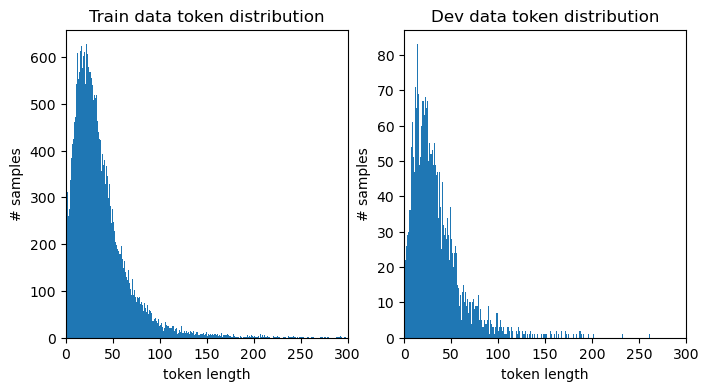

In [47]:
fig, (ax1, ax2) = plt.subplots(figsize = (8, 4), nrows = 1, ncols = 2)
ax1.bar(list(train_token_distribution.keys()), list(train_token_distribution.values()), width=1)
ax1.set(xlabel='token length', ylabel='# samples')
ax1.set_title('Train data token distribution')
ax1.set_xlim(0,300)

ax2.bar(list(dev_token_distribution.keys()), list(dev_token_distribution.values()), width=1)
ax2.set(xlabel='token length', ylabel='# samples')
ax2.set_title('Dev data token distribution')
ax2.set_xlim(0,300)

fig.savefig('token_distribution_plt.jpg')
fig.show()